![qlearning[3]_thumb[1].png](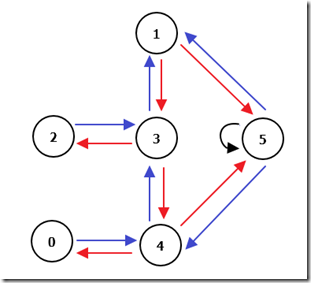)

In [1]:
import numpy as np

# R matrix
R = np.matrix(
    [ 
     [-1,  -1,  -1,  -1,   0,    -1],
     [-1,  -1,  -1,   0,  -1,   100],
     [-1,  -1,  -1,   0,  -1,    -1],
     [-1,   0,   0,  -1,   0,    -1],
     [-1,   0,   0,  -1,  -1,   100],
     [-1,   0,  -1,  -1,   0,   100]
    ]
)

# Q matrix
Q = np.matrix(np.zeros([6,6]))

# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

#-------------------------------------------------------------------------------
# Training

# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

#-------------------------------------------------------------------------------
# Testing

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

#-------------------------------------------------------------------------------
#                               OUTPUT
#-------------------------------------------------------------------------------
#
# Trained Q matrix:
#[[   0.     0.     0.     0.    80.     0. ]
# [   0.     0.     0.    64.     0.   100. ]
# [   0.     0.     0.    64.     0.     0. ]
# [   0.    80.    51.2    0.    80.     0. ]
# [   0.    80.    51.2    0.     0.   100. ]
# [   0.    80.     0.     0.    80.   100. ]]
#
# Selected path:
# [2, 3, 1, 5]
# 

Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]
Selected path:
[2, 3, 1, 5]
